[*********************100%***********************]  5 of 5 completed


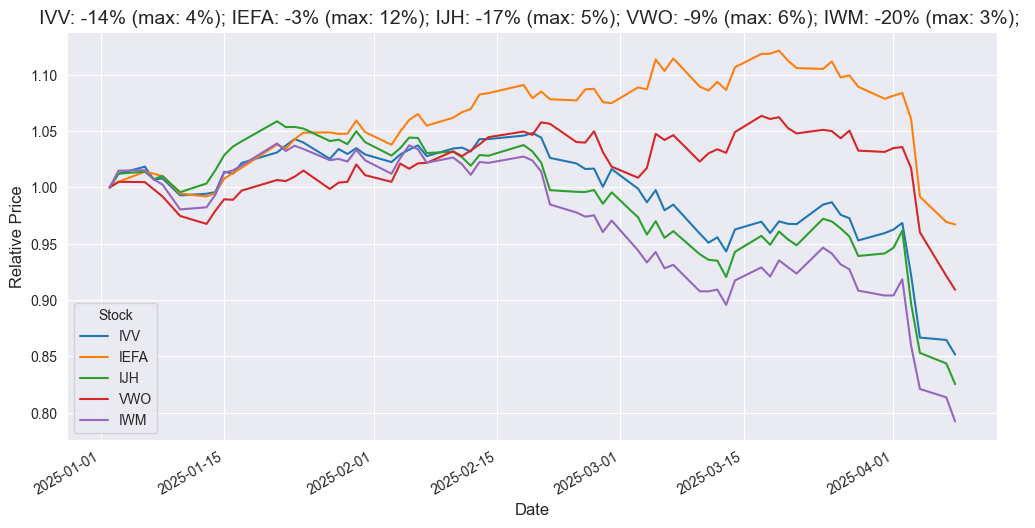

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from datetime import datetime

tickers = [
    "IVV" # S&P 500
    , "IEFA" # developed international markets -- high volatility
    , "IJH" # mid-cap stocks; higher risk than large-caps, but potential for higher growth
    , "VWO" # emerging markets -- high risk
    , "IWM" # small cap US stocks; look for greater growth
]

# Start date
start = "2025-01-01"

# End date (today)
end = datetime.today().strftime('%Y-%m-%d')

# Download data
df = yf.download(tickers, start=start, end=end)

# Extract dates from index
dates = df.index

# Initialize dictionary for normalized prices
di = {'dates': dates}

# Normalize each ticker's price (relative to the first value)
for ticker in tickers:
    data = df['Close'][ticker].tolist()  # Extract close prices
    first_el = data[0]  # First price for normalization
    lst = [price / first_el for price in data]  # Compute normalized prices
    di[ticker] = lst  # Store in dictionary

# Convert to DataFrame and set index
df = pd.DataFrame(data=di).set_index('dates')

# Plot the normalized stock prices
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")  # Use seaborn style
df.plot(ax=plt.gca())  # Use current axis

title = ""

for ticker in tickers:
    perc_change = int(100*(di[ticker][::-1][0] - 1))
    max_change = int(100*(max(di[ticker])-1))
    el1 = str(perc_change) + "%"
    el2 = str(max_change) + "%"
    if perc_change >= 0:
        title += f"{ticker}: +{el1} (max: {el2}); "
    else: 
        title += f"{ticker}: {el1} (max: {el2}); "

# Add title and labels
plt.title(f"{title}", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Relative Price", fontsize=12)
plt.legend(title="Stock", fontsize=10)
plt.show()


In [30]:
# Which months, on average, have the highest prices?

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

tickers = [
    "KMX"
]

start = "2003-01-01"
end = "2025-01-31"

# Download data
df = yf.download(tickers, start=start, end=end)

# Extract dates from index
dates = df.index

# Initialize dictionary for normalized prices
di = {'dates': dates}

# Normalize each ticker's price (relative to the first value)
for ticker in tickers:
    data = df['Close'][ticker].tolist()  # Extract close prices
    first_el = data[0]  # First price for normalization
    lst = [price / first_el for price in data]  # Compute normalized prices
    di[ticker] = lst  # Store in dictionary

# Convert to DataFrame and set index
df = pd.DataFrame(data=di).set_index('dates')

conn = sqlite3.connect("test.db")

dates = df[tickers[0]].index.tolist()
prices = df[tickers[0]].tolist()

df = pd.DataFrame(data={
    "date": dates,
    "price": prices
})

df.to_sql('gasoline', conn, if_exists='replace', index=False)

# Query from the table using SQLite
query = """
with

a as (SELECT
strftime('%Y', date) year
, strftime('%m', date) month
, date
, price
FROM gasoline
)

, b as (select
year
, month
, date
, price
, avg(price) over (partition by year) year_avg
from a
)

, c as (select
year
, month
, date
, price
, year_avg
, price/year_avg as price_to_year
from b
)

select
month
, avg(price_to_year)
from c
group by 1
order by 1 asc
;
"""
result = pd.read_sql(query, conn)

result

[*********************100%***********************]  1 of 1 completed


,month,avg(price_to_year)
0,01,0.961272
1,02,0.973425
2,03,0.963715
3,04,0.969116
4,05,0.965052
5,06,0.975104
6,07,1.009641
7,08,1.023922
8,09,1.044364
9,10,1.011105


In [31]:
# tkinter demo

import tkinter as tk
from tkinter import simpledialog

def get_user_input():
    root = tk.Tk()
    root.withdraw()  # Hide the root window
    user_input = simpledialog.askstring("Input", "Enter a string value:")
    
    if user_input is not None:
        print("You entered:", user_input)
    else:
        print("No input provided")

get_user_input()

ModuleNotFoundError: No module named 'tkinter'

In [21]:
# Simulate dollar-cost averaging:

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from datetime import datetime

# import tkinter as tk
# from tkinter import simpledialog

# root = tk.Tk()
# root.withdraw()  # Hide the root window
# tickers_input = simpledialog.askstring("Input", "Enter tickers:")
# tickers = tickers_input.split(" ")
# start = simpledialog.askstring("Input", "Enter a start date:")

tickers = [
    "IVV" # S&P 500
]

# Start date
start = "2025-01-01"

# End date (today)
end = datetime.today().strftime('%Y-%m-%d')

# Download data
df = yf.download(tickers, start=start, end=end)

# Extract dates from index
dates = df.index

daily_prices = df["Close"].IVV.tolist()

first_close = daily_prices[0] 
last_close = daily_prices[::-1][0]
avg_price = np.mean(daily_prices)
max_price = max(daily_prices)

dca_return = (last_close - avg_price) / avg_price
ytd_return = (last_close - first_close) / first_close
max_return = (last_close - max_price) / max_price

print(f"DCA Return Since Start: {round(float(dca_return), 3)}")
print(f"Return Since Start: {round(float(ytd_return), 3)}")
print(f"Deviation from Maximum: {round(float(max_return), 3)}")
print(f"Current Price: {round(float(last_close),2)}")

[*********************100%***********************]  1 of 1 completed

DCA Return Since Start: -0.06
Return Since Start: -0.044
Deviation from Maximum: -0.088
Current Price: 561.48


In [24]:
# Crash dates:

import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime

# Download stock data

ticker = "DIS"
threshold = 0.50

tickers = [ticker]  # S&P 500
start = "2017-01-01"
end = datetime.today().strftime('%Y-%m-%d')

df = yf.download(tickers, start=start, end=end)["Close"]

# Extract relevant series
df_ivv = df[ticker]

# Vectorized calculation for drawdowns
rolling_max = df_ivv.cummax()  # Tracks the highest price up to each date
drawdown = df_ivv / rolling_max - 1  # Calculate drawdown percentage

# Find dates where the drawdown exceeds the threshold
crash_dates = drawdown[drawdown <= -threshold]

# Print results
pd.DataFrame(data=crash_dates)

[*********************100%***********************]  1 of 1 completed

,DIS
Date,
2022-06-10,-0.507701
2022-06-13,-0.525977
2022-06-14,-0.533356
2022-06-15,-0.525135
2022-06-16,-0.533059
...,...
2025-03-11,-0.509141
2025-03-12,-0.504829
2025-03-13,-0.514305


In [ ]:
# Biggest Declines

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# Define the stock ticker
ticker = "SPY"  # Replace with your desired stock symbol
num_days = 20000

# Fetch historical market data
data = yf.Ticker(ticker).history(period=f"{num_days}d")

# Extract the closing price
closing_price = data['Close']

# closing_price

dtd_change = []

for i in range(len(closing_price.tolist())):
    if i == 0:
        val = 1
    else:
        val = closing_price.tolist()[i] / closing_price.tolist()[i-1]
    dtd_change.append(val - 1)

dates = closing_price.index
price = closing_price.tolist()
change = dtd_change

df_new = pd.DataFrame(
    data = {
        "date": dates,
        "price": price,
        "change": change
    }
)

df_new2 = df_new[["date", "change"]].sort_values(by="change")

conn = sqlite3.connect("test.db")
df_new2.to_sql("table1", conn, if_exists="replace")

pd.read_sql_query("""
with

a as (select
*
, strftime('%Y', date) AS year
, row_number() over (order by abs(change) desc) rn
from table1
)

, b as (select
*
from a
where abs(change) >= 0.05
)

select
year
, count(*) num
from b
group by 1
order by 2 desc
;
"""

, conn
)